# Types of Regression

## Lasso | Ridge | Elastic Net | Bayesian Ridge | Huber | Kernel Ridge | Support Vector | Gausian Process

Credits: http://scikit-learn.org/stable/

#### Lasso Regression - Overview

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. 

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1-norm$ of the parameter vector.

#### Ridge Regression - Overview

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,


$$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$

Here, $$\alpha \geq 0$$ is a complexity parameter that controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

#### ElasticNet Regression - Overview

ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

#### Bayesian Ridge Regression - Overview

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing uninformative priors over the hyper parameters of the model. The $\ell_{2}$ regularization used in Ridge Regression is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the parameters $w$ with precision $\lambda^{-1}$. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output $y$ is assumed to be Gaussian distributed around $X w$:

$$p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)$$

Alpha is again treated as a random variable that is to be estimated from the data.

The advantages of Bayesian Regression are:

- It adapts to the data at hand.
- It can be used to include regularization parameters in the estimation procedure.

BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the parameter  $w$ is given by a spherical Gaussian:

$$p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}I_{p})$$

The priors over $\alpha$ and $\lambda$ are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian.

The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge. The parameters $w$, $\alpha$ and $\lambda$ are estimated jointly during the fit of the model. The remaining hyperparameters are the parameters of the gamma priors over $\alpha$ and $\lambda$. These are usually chosen to be non-informative. The parameters are estimated by maximizing the marginal log likelihood.

By default $\alpha_1 = \alpha_2 =  \lambda_1 = \lambda_2 = 10^{-6}$.

#### Huber Regression - Overview

The HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from TheilSenRegressor and RANSACRegressor because it does not ignore the effect of the outliers but gives a lesser weight to them.

The loss function that HuberRegressor minimizes is given by

$$\underset{w, \sigma}{min\,} {\sum_{i=1}^n\left(\sigma + H_m\left(\frac{X_{i}w - y_{i}}{\sigma}\right)\sigma\right) + \alpha {||w||_2}^2}$$

where

$$H_m(z) = \begin{cases}
       z^2, & \text {if } |z| < \epsilon, \\
       2\epsilon|z| - \epsilon^2, & \text{otherwise}
\end{cases}$$

It is advised to set the parameter $epsilon$ to 1.35 to achieve 95% statistical efficiency.

The HuberRegressor differs from using SGDRegressor with loss set to huber in the following ways.

- HuberRegressor is scaling invariant. Once epsilon is set, scaling X and y down or up by different values would produce the same robustness to outliers as before. as compared to SGDRegressor where epsilon has to be set again when X and y are scaled.
- HuberRegressor should be more efficient to use on data with small number of samples while SGDRegressor needs a number of passes on the training data to produce the same robustness.

#### Kernel Ridge Regression - Overview

Kernel ridge regression (KRR) combines Ridge Regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by KernelRidge is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses \epsilon-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting KernelRidge can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for $\epsilon > 0$, at prediction-time.

#### Support Vector Regression - Overview

The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.



There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

#### Gaussian Process Regression - Overview

The GaussianProcessRegressor implements Gaussian processes (GP) for regression purposes. For this, the prior of the GP needs to be specified. The prior mean is assumed to be constant and zero (for normalize_y=False) or the training data’s mean (for normalize_y=True). The prior’s covariance is specified by a passing a kernel object. The hyperparameters of the kernel are optimized during fitting of GaussianProcessRegressor by maximizing the log-marginal-likelihood (LML) based on the passed optimizer. As the LML may have multiple local optima, the optimizer can be started repeatedly by specifying n_restarts_optimizer.

Kernels (also called “covariance functions” in the context of GPs) are a crucial ingredient of GPs which determine the shape of prior and posterior of the GP. They encode the assumptions on the function being learned by defining the “similarity” of two datapoints combined with the assumption that similar datapoints should have similar target values. Two categories of kernels can be distinguished: stationary kernels depend only on the distance of two datapoints and not on their absolute values k(x_i, x_j)= k(d(x_i, x_j)) and are thus invariant to translations in the input space, while non-stationary kernels depend also on the specific values of the datapoints. 

The advantages of Gaussian processes are:

- The prediction interpolates the observations (at least for regular kernels).
- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.
- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of Gaussian processes include:

- They are not sparse, i.e., they use the whole samples/features information to perform the prediction.
- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

#### Comparison Metrics

- Explained Variance Score:
    - If $\hat{ y } $ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$\texttt{explained_variance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$

- Mean Absolute Error:
    - The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or $l1-norm$ loss.

- Mean Squared Error: 
    - The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

- $R^2$ - Coefficient of Determination
    - It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [1]:
from sklearn import linear_model

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
data_trade = pd.read_csv('dataset/massaged_trade_data.csv')

In [5]:
data_ask = pd.read_csv('dataset/massaged_ask_data.csv')

In [6]:
data_bid = pd.read_csv('dataset/massaged_bid_data.csv')

In [7]:
openp_t = data_trade.loc[:, 'open'].tolist()
highp_t = data_trade.loc[:, 'high'].tolist()
lowp_t = data_trade.loc[:, 'low'].tolist()
closep_t = data_trade.loc[:, 'close'].tolist()
volumep_t = data_trade.loc[:, 'volume'].tolist()

In [8]:
openp_a = data_ask.loc[:, 'open'].tolist()
highp_a = data_ask.loc[:, 'high'].tolist()
lowp_a = data_ask.loc[:, 'low'].tolist()
closep_a = data_ask.loc[:, 'close'].tolist()
volumep_a = data_ask.loc[:, 'volume'].tolist()

In [9]:
openp_b = data_bid.loc[:, 'open'].tolist()
highp_b = data_bid.loc[:, 'high'].tolist()
lowp_b = data_bid.loc[:, 'low'].tolist()
closep_b = data_bid.loc[:, 'close'].tolist()
volumep_b = data_bid.loc[:, 'volume'].tolist()

In [10]:
def data2change(data):
    change = pd.DataFrame(data).pct_change()
    change = change.replace([np.inf, -np.inf], np.nan)
    change = change.fillna(0.).values.tolist()
    change = [c[0] for c in change]
    return change

In [11]:
def create_Xt_Yt(X, y, percentage=0.9):
    p = int(len(X) * percentage)
    X_train = X[0:p]
    Y_train = y[0:p]
     
    X_train, Y_train = shuffle_in_unison(X_train, Y_train)
 
    X_test = X[p:]
    Y_test = y[p:]

    return X_train, X_test, Y_train, Y_test

In [12]:
def shuffle_in_unison(a, b):
    # courtsey http://stackoverflow.com/users/190280/josh-bleecher-snyder
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [13]:
openp_t = data2change(openp_t)
highp_t = data2change(highp_t)
lowp_t = data2change(lowp_t)
closep_t = data2change(closep_t)
volumep_t = data2change(volumep_t)

In [14]:
openp_a = data2change(openp_a)
highp_a = data2change(highp_a)
lowp_a = data2change(lowp_a)
closep_a = data2change(closep_a)
volumep_a = data2change(volumep_a)

In [15]:
openp_b = data2change(openp_b)
highp_b = data2change(highp_b)
lowp_b = data2change(lowp_b)
closep_b = data2change(closep_b)
volumep_b = data2change(volumep_b)

In [16]:
WINDOW = 1
EMB_SIZE = 13
STEP = 1
FORECAST = 1

In [17]:
X, Y = [], []
for i in range(0, len(data_trade), STEP): 
    try:
        o_a = openp_a[i:i+WINDOW]
        o_b = openp_a[i:i+WINDOW]
        o_t = openp_a[i:i+WINDOW]
        h_a = highp_a[i:i+WINDOW]
        h_b = highp_b[i:i+WINDOW]
        h_t = highp_t[i:i+WINDOW]
        l_a = lowp_a[i:i+WINDOW]
        l_b = lowp_b[i:i+WINDOW]
        l_t = lowp_t[i:i+WINDOW]
        c_a = closep_a[i:i+WINDOW]
        c_b = closep_b[i:i+WINDOW]
        c_t = closep_t[i:i+WINDOW]
        v_t = volumep_t[i:i+WINDOW]

#        volat = volatility[i:i+WINDOW]

#        y_i = volatility[i+WINDOW+FORECAST] 
#        y_i = closep_t[i+WINDOW+FORECAST] 
        y_i = volumep_t[i+WINDOW+FORECAST] 
    
        x_i = np.column_stack((o_a, o_b, o_b, h_a, h_b, h_t, l_a, l_b, l_t, c_a, c_b, c_t, v_t))

    except Exception as e:
        break

    X.append(x_i)
    Y.append(y_i)

X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y)

In [18]:
X_train = X_train.reshape(X_train.shape[0],-1)

In [19]:
X_test = X_test.reshape(X_test.shape[0],-1)

In [ ]:
X_train[5]

In [ ]:
np.shape(X_test)

In [ ]:
X_train.shape[0]

#### Lasso Regression - Implementation

In [74]:
alpha = 0.1
lasso = linear_model.Lasso(alpha=alpha)

In [75]:
y_pred_lasso = lasso.fit(X_train, Y_train).predict(X_test)

In [77]:
evs_lasso = explained_variance_score(Y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_score_lasso = r2_score(Y_test, y_pred_lasso)

In [78]:
print(lasso)
print("evs on test data : %f" % evs_lasso)
print("mae on test data : %f" % mae_lasso)
print("mse on test data : %f" % mse_lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
evs on test data : 0.000209
mae on test data : 1.221868
mse on test data : 37.160723
r^2 on test data : -0.009332


#### Elastic Net Reggression - Implementation

In [79]:
enet = linear_model.ElasticNet(alpha=alpha, l1_ratio=0.7)

In [80]:
y_pred_enet = enet.fit(X_train, Y_train).predict(X_test)

In [81]:
evs_enet = explained_variance_score(Y_test, y_pred_enet)
mae_enet = mean_absolute_error(Y_test, y_pred_enet)
mse_enet = mean_squared_error(Y_test, y_pred_enet)
r2_score_enet = r2_score(Y_test, y_pred_enet)

In [82]:
print(enet)
print("evs on test data : %f" % evs_enet)
print("mae on test data : %f" % mae_enet)
print("mse on test data : %f" % mse_enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
evs on test data : 0.000308
mae on test data : 1.222002
mse on test data : 37.158647
r^2 on test data : -0.009276


In [ ]:
plt.figure()
plt.plot(Y_test, label = "Y_test")
plt.plot(y_pred_enet, label = "E_Net_Pred")
plt.plot(y_pred_lasso, label = "Lasso_Pred")
plt.legend()
plt.show()

#### Ridge Regression - Implementation

In [85]:
ridge = linear_model.Ridge (alpha = .5)

In [86]:
y_pred_ridge = ridge.fit(X_train, Y_train).predict(X_test)

In [87]:
evs_ridge = explained_variance_score(Y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_score_ridge = r2_score(Y_test, y_pred_ridge)


In [88]:
print(ridge)
print("evs on test data : %f" % evs_ridge)
print("mae on test data : %f" % mae_ridge)
print("mse on test data : %f" % mse_ridge)
print("r^2 on test data : %f" % r2_score_ridge)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
evs on test data : 0.000516
mae on test data : 1.222955
mse on test data : 37.154745
r^2 on test data : -0.009170


#### Bayesian Ridge Regression - Implementation

In [90]:
bayesian_ridge = linear_model.BayesianRidge()

In [91]:
y_pred_bayesian_ridge = bayesian_ridge.fit(X_train, Y_train).predict(X_test)

In [92]:
evs_bayesian_ridge = explained_variance_score(Y_test, y_pred_bayesian_ridge)
mae_bayesian_ridge = mean_absolute_error(Y_test, y_pred_bayesian_ridge)
mse_bayesian_ridge = mean_squared_error(Y_test, y_pred_bayesian_ridge)
r2_score_bayesian_ridge = r2_score(Y_test, y_pred_bayesian_ridge)

In [93]:
print(bayesian_ridge)
print("evs on test data : %f" % evs_bayesian_ridge)
print("mae on test data : %f" % mae_bayesian_ridge)
print("mse on test data : %f" % mse_bayesian_ridge)
print("r^2 on test data : %f" % r2_score_bayesian_ridge)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
evs on test data : 0.000104
mae on test data : 1.223080
mse on test data : 37.163057
r^2 on test data : -0.009396


#### Huber Regression - Implementation

In [95]:
huber = linear_model.HuberRegressor()

In [96]:
y_pred_huber = huber.fit(X_train, Y_train).predict(X_test)

In [97]:
evs_huber = explained_variance_score(Y_test, y_pred_huber)
mae_huber = mean_absolute_error(Y_test, y_pred_huber)
mse_huber = mean_squared_error(Y_test, y_pred_huber)
r2_score_huber = r2_score(Y_test, y_pred_huber)

In [98]:
print(huber)
print("evs on test data : %f" % evs_huber)
print("mae on test data : %f" % mae_huber)
print("mse on test data : %f" % mse_huber)
print("r^2 on test data : %f" % r2_score_huber)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
evs on test data : 0.000161
mae on test data : 1.153001
mse on test data : 37.513227
r^2 on test data : -0.018907


#### Kernel Ridge Regression - Implementation

In [99]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [ ]:
kernel_ridge = KernelRidge(alpha=1.0)

In [ ]:
kernel_ridge = KernelRidge(alpha=1.0,
                          kernel = "linear")

In [100]:
# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {"alpha": [1],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 3)
                         for p in np.logspace(0, 2, 3)]}

In [101]:
kernel_ridge = GridSearchCV(KernelRidge(), cv=2, param_grid=param_grid)

In [102]:
y_pred_kernel_ridge = kernel_ridge.fit(X_train, Y_train).predict(X_test)

In [103]:
evs_kernel_ridge = explained_variance_score(Y_test, y_pred_kernel_ridge)
mae_kernel_ridge = mean_absolute_error(Y_test, y_pred_kernel_ridge)
mse_kernel_ridge = mean_squared_error(Y_test, y_pred_kernel_ridge)
r2_score_kernel_ridge = r2_score(Y_test, y_pred_kernel_ridge)

In [104]:
print(kernel_ridge)
print("evs on test data : %f" % evs_kernel_ridge)
print("mae on test data : %f" % mae_kernel_ridge)
print("mse on test data : %f" % mse_kernel_ridge)
print("r^2 on test data : %f" % r2_score_kernel_ridge)

GridSearchCV(cv=2, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1], 'kernel': [ExpSineSquared(length_scale=0.01, periodicity=1), ExpSineSquared(length_scale=0.01, periodicity=10), ExpSineSquared(length_scale=0.01, periodicity=100), ExpSineSquared(length_scale=1, periodicity=1), ExpSineSquared(length_scale=1, periodicity=10), ExpSineSquared(length_scale=1, periodicity=100), ExpSineSquared(length_scale=100, periodicity=1), ExpSineSquared(length_scale=100, periodicity=10), ExpSineSquared(length_scale=100, periodicity=100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
evs on test data : 0.003947
mae on test data : 1.248085
mse on test data : 37.005173
r^2 on test data : -0.005107


#### Support Vector Regression - Implementation

In [105]:
from sklearn.svm import SVR

In [106]:
#RBF - Raidal Basis Function
svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1)

In [107]:
y_pred_svr_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)

In [112]:
evs_svr_rbf = explained_variance_score(Y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(Y_test, y_pred_svr_rbf)
mse_svr_rbf = mean_squared_error(Y_test, y_pred_svr_rbf)
r2_score_svr_rbf = r2_score(Y_test, y_pred_svr_rbf)

In [113]:
print(svr_rbf)
print("evs on test data : %f" % evs_svr_rbf)
print("mae on test data : %f" % mae_svr_rbf)
print("mse on test data : %f" % mse_svr_rbf)
print("r^2 on test data : %f" % r2_score_svr_rbf)


SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
evs on test data : 0.000334
mae on test data : 1.155901
mse on test data : 37.683599
r^2 on test data : -0.023534


In [24]:
svr_lin = SVR(kernel='linear', C= 1e-2)

In [25]:
y_pred_svr_lin = svr_lin.fit(X_train, Y_train).predict(X_test)

In [114]:
evs_svr_lin = explained_variance_score(Y_test, y_pred_svr_lin)
mae_svr_lin = mean_absolute_error(Y_test, y_pred_svr_lin)
mse_svr_lin = mean_squared_error(Y_test, y_pred_svr_lin)
r2_score_svr_lin = r2_score(Y_test, y_pred_svr_lin)

In [115]:
print(svr_lin)
print("evs on test data : %f" % evs_svr_lin)
print("mae on test data : %f" % mae_svr_lin)
print("mse on test data : %f" % mse_svr_lin)
print("r^2 on test data : %f" % r2_score_svr_lin)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
evs on test data : 0.000154
mae on test data : 1.152283
mse on test data : 37.688472
r^2 on test data : -0.023667


In [27]:
svr_poly = SVR(kernel='poly', C=1e-2, degree=2)

In [28]:
y_pred_svr_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

In [116]:
evs_svr_poly = explained_variance_score(Y_test, y_pred_svr_poly)
mae_svr_poly = mean_absolute_error(Y_test, y_pred_svr_poly)
mse_svr_poly = mean_squared_error(Y_test, y_pred_svr_poly)
r2_score_svr_poly = r2_score(Y_test, y_pred_svr_poly)

In [117]:
print(svr_poly)
print("evs on test data : %f" % evs_svr_poly)
print("mae on test data : %f" % mae_svr_poly)
print("mse on test data : %f" % mse_svr_poly)
print("r^2 on test data : %f" % r2_score_svr_poly)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
evs on test data : 0.000040
mae on test data : 1.151965
mse on test data : 37.689381
r^2 on test data : -0.023691


#### Gausian Process Regression - Implementation

In [66]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [69]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel= kernel)

In [70]:
y_pred_gpr= gpr.fit(X_train, Y_train).predict(X_test)

In [118]:
evs_gpr = explained_variance_score(Y_test, y_pred_gpr)
mae_gpr = mean_absolute_error(Y_test, y_pred_gpr)
mse_gpr = mean_squared_error(Y_test, y_pred_gpr)
r2_score_gpr = r2_score(Y_test, y_pred_gpr)

In [119]:
print(gpr)
print("evs on test data : %f" % evs_gpr)
print("mae on test data : %f" % mae_gpr)
print("mse on test data : %f" % mse_gpr)
print("r^2 on test data : %f" % r2_score_gpr)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)
evs on test data : -5484.830782
mae on test data : 70.138253
mse on test data : 201980.181710
r^2 on test data : -5485.037677


In [ ]:
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(Y_test[510], label = "Y_test")
#plt.plot(y_pred_enet, label = "E_Net_Pred")
#plt.plot(y_pred_lasso, label = "Lasso_Pred")
#plt.plot(y_pred_ridge, label = "Ridge_Pred")
#plt.plot(y_pred_bayesian_ridge, label = "Bayesian_Ridge_Pred")
plt.legend()
plt.show()

In [146]:
import pandas as pd

In [178]:
models = ['Lasso', 'ENet', 'Ridge', 'Bayesian_Ridge', 'Huber', 'Kernel_Ridge', 'SVR_RBF',
                    'SVR_Lin', 'SVR_Poly', 'GPR']

In [242]:
evs = [evs_lasso, evs_enet, evs_ridge, evs_bayesian_ridge, evs_huber, evs_kernel_ridge,
               evs_svr_rbf, evs_svr_lin, evs_svr_poly, evs_gpr]

In [182]:
mae = [mae_lasso, mae_enet, mae_ridge, mae_bayesian_ridge, mae_huber, mae_kernel_ridge,
               mae_svr_rbf, mae_svr_lin, mae_svr_poly, mae_gpr]

In [186]:
mse = [mse_lasso, mse_enet, mse_ridge, mse_bayesian_ridge, mse_huber, mse_kernel_ridge,
               mse_svr_rbf, mse_svr_lin, mse_svr_poly, mse_gpr]

In [190]:
r2_score = [r2_score_lasso, r2_score_enet, r2_score_ridge, r2_score_bayesian_ridge, r2_score_huber, 
                    r2_score_kernel_ridge, r2_score_svr_rbf, r2_score_svr_lin, r2_score_svr_poly, r2_score_gpr]

In [243]:
d = [models, evs, mae, mse, r2_score]

In [244]:
results = pd.DataFrame(d).T

In [245]:
results.columns = ["Models", "EVS", "MAE", "MSE", "R2_Score"]

In [246]:
results = results.set_index('Models')

In [247]:
results

,EVS,MAE,MSE,R2_Score
Models,,,,
Lasso,0.000208653,1.22187,37.1607,-0.00933233
ENet,0.000308221,1.222,37.1586,-0.00927593
Ridge,0.000516443,1.22296,37.1547,-0.00916995
Bayesian_Ridge,0.000104218,1.22308,37.1631,-0.00939573
Huber,0.000160841,1.153,37.5132,-0.0189068
Kernel_Ridge,0.00394662,1.24808,37.0052,-0.0051074
SVR_RBF,0.000333819,1.1559,37.6836,-0.0235343
SVR_Lin,0.000153805,1.15228,37.6885,-0.0236667
SVR_Poly,3.97819e-05,1.15196,37.6894,-0.0236914


In [248]:
results = results.astype('float64') 

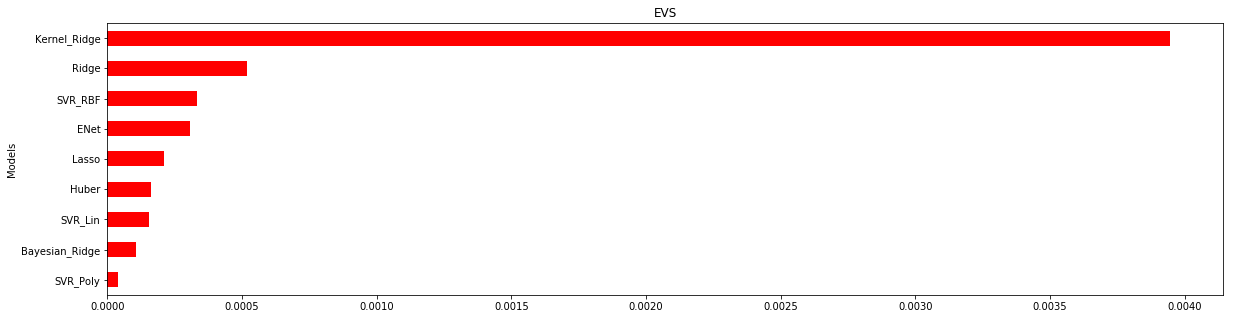

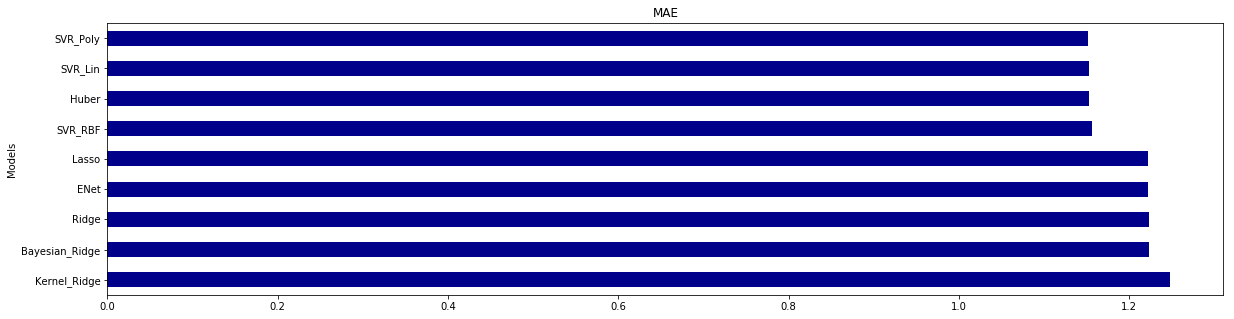

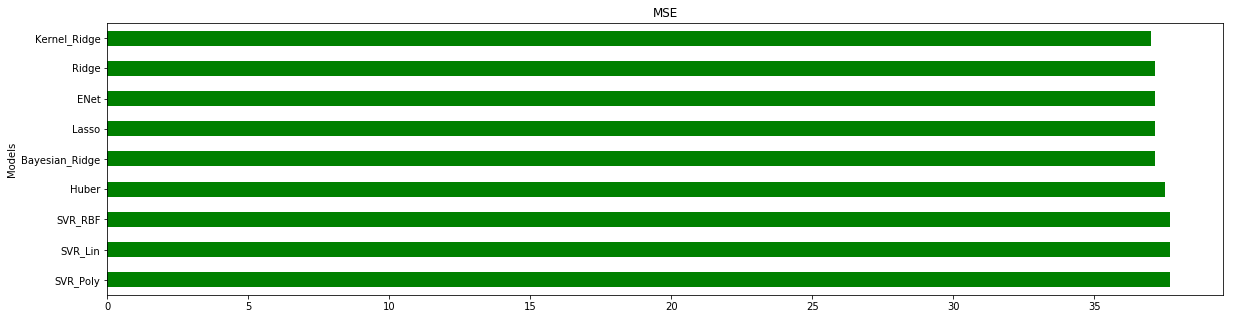

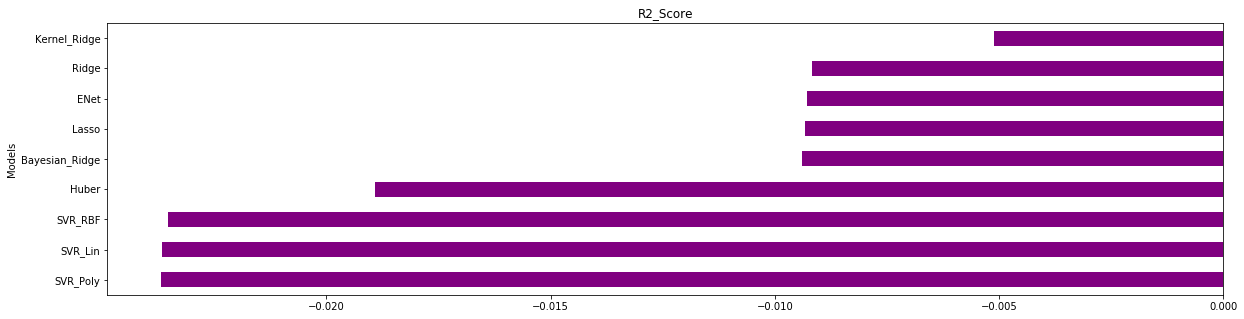

In [375]:
plt.figure()
plt.figure(figsize=(20,5))
results.sort_values(by='EVS', ascending=True)['EVS'][1:].plot(kind = 'barh', subplots = True, color = 'red',
                                                              grid = False);
plt.show()
plt.figure(figsize=(20,5))
results.sort_values(by='MAE', ascending=False)['MAE'][1:].plot(kind = 'barh', subplots = True, color = 'darkblue',
                                                              grid = False);
plt.show();
plt.figure(figsize=(20,5))
results.sort_values(by='MSE', ascending=False)['MSE'][1:].plot(kind = 'barh', subplots = True, color = 'green',
                                                              grid = False);
plt.show();
plt.figure(figsize=(20,5))
results.sort_values(by='R2_Score', ascending=True)['R2_Score'][1:].plot(kind = 'barh', subplots = True, 
                                                                         color = 'purple', grid = False);
plt.show();

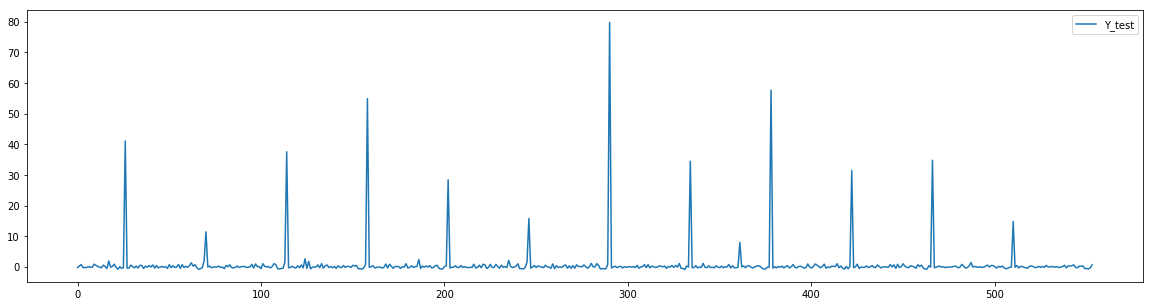

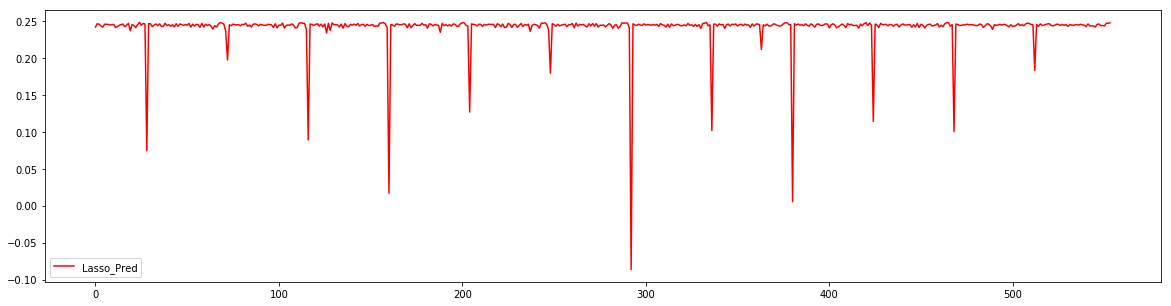

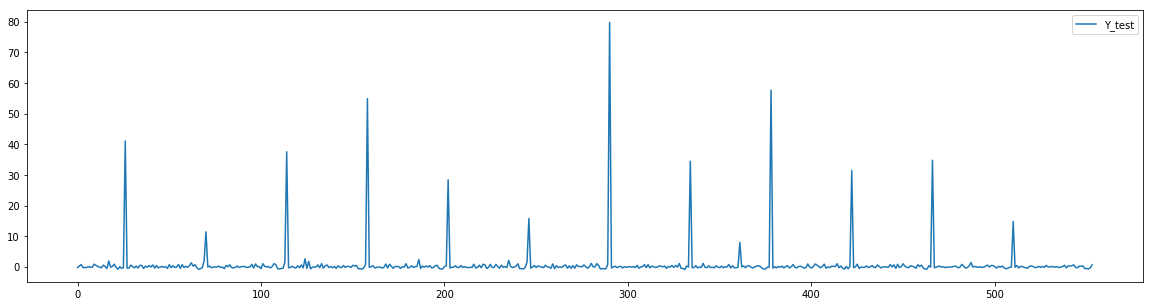

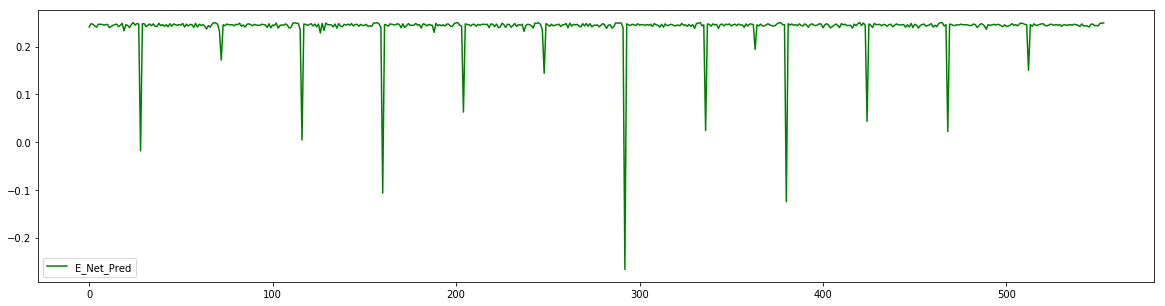

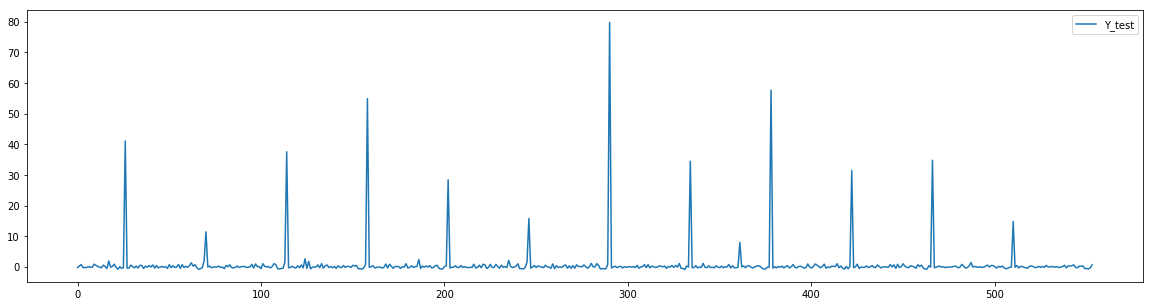

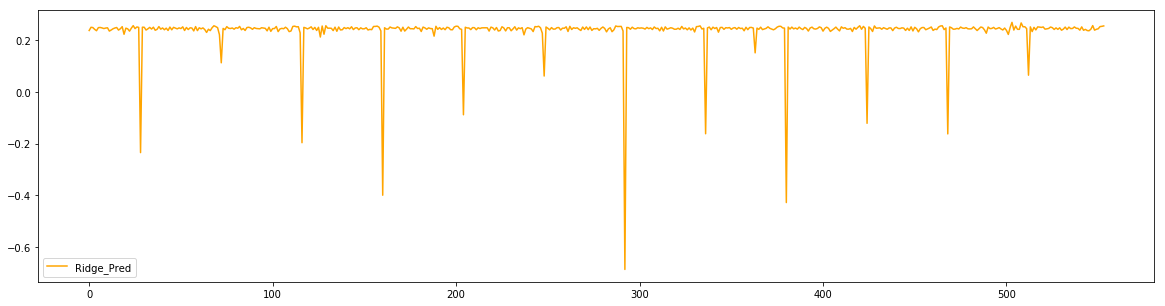

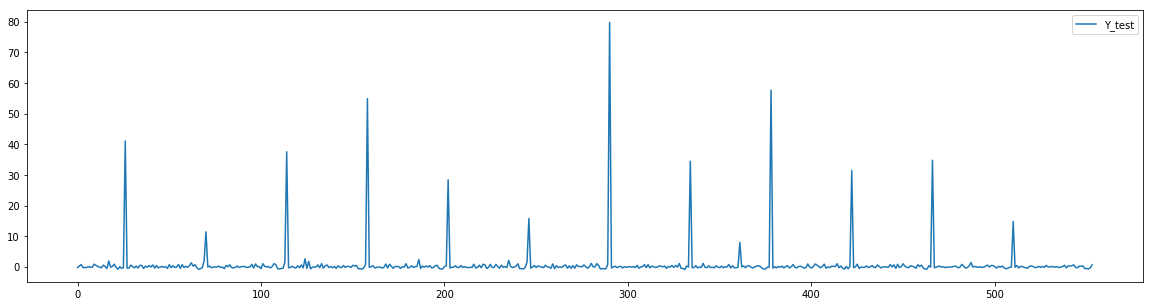

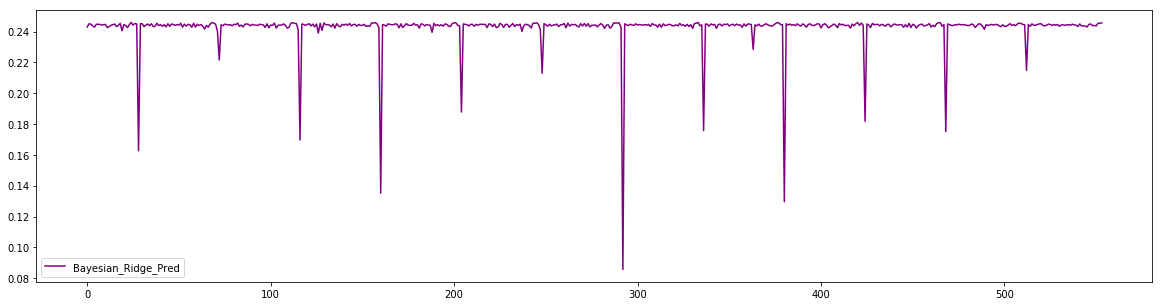

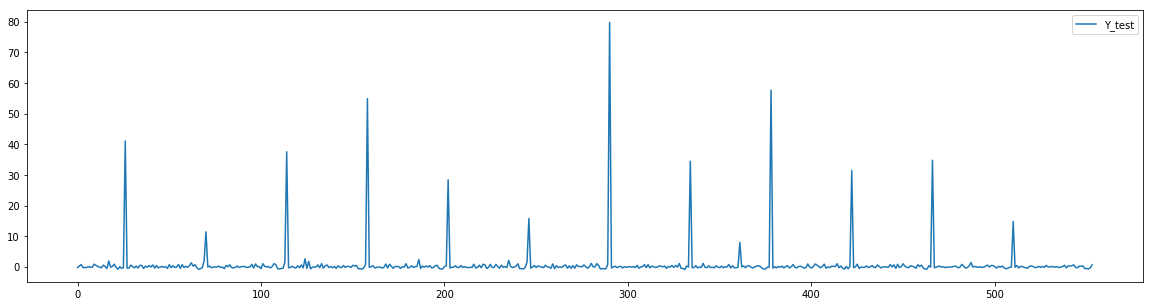

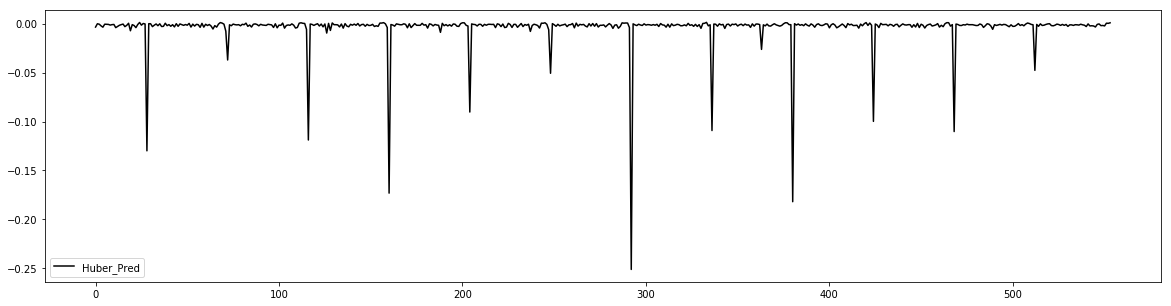

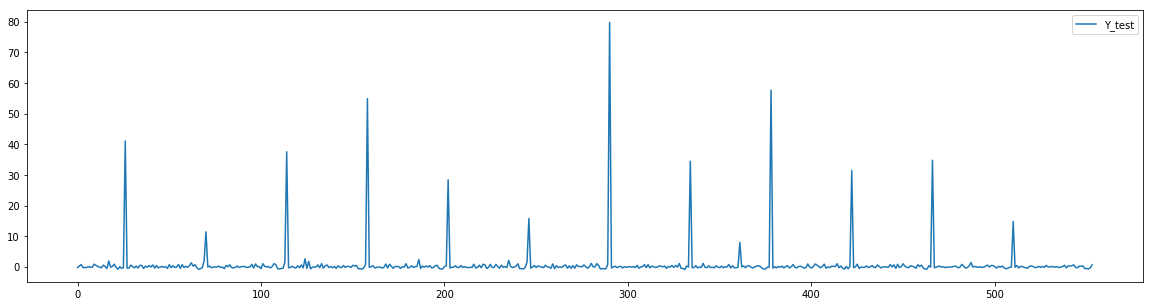

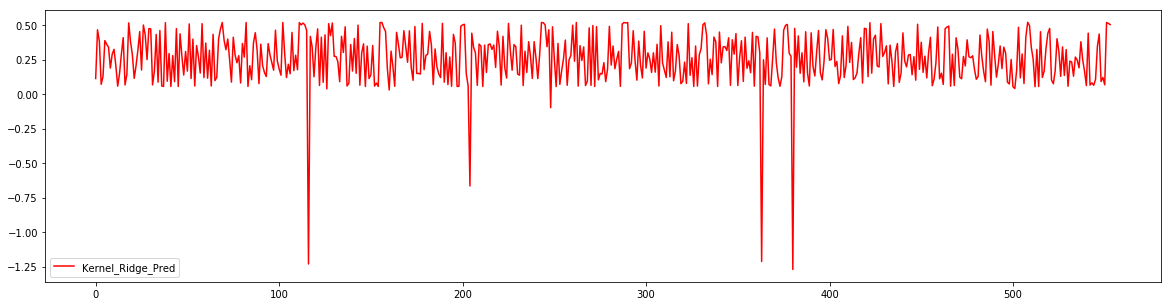

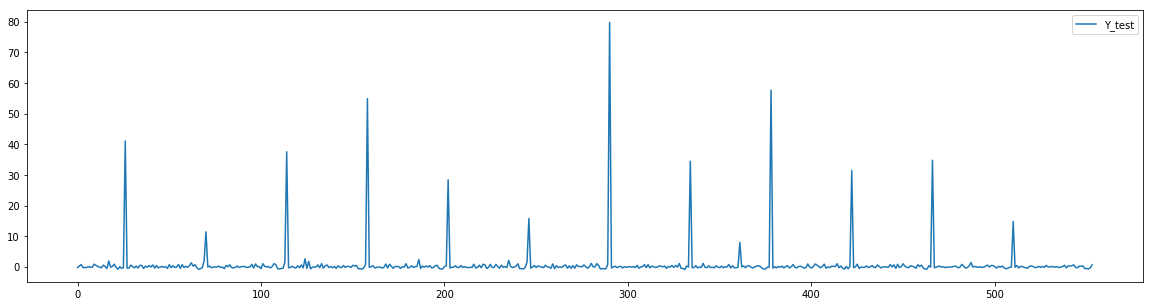

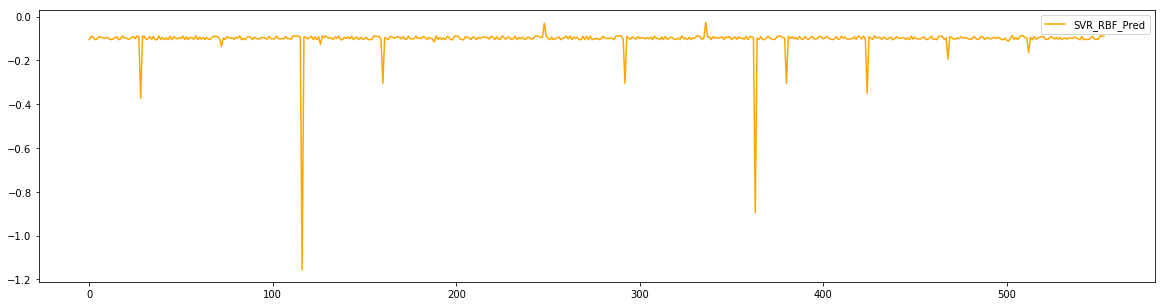

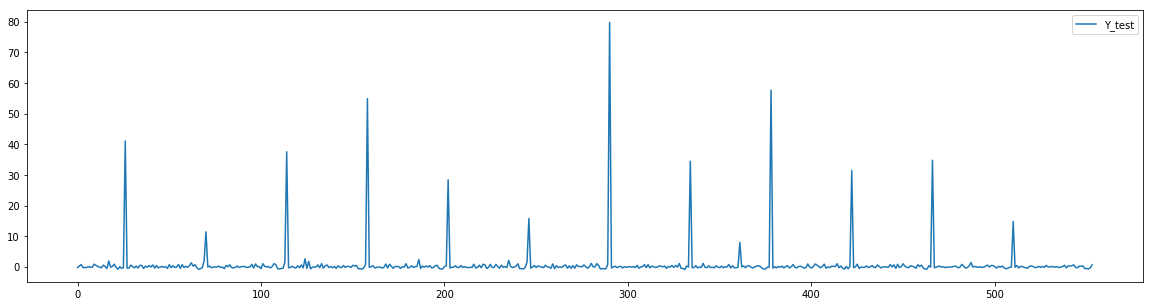

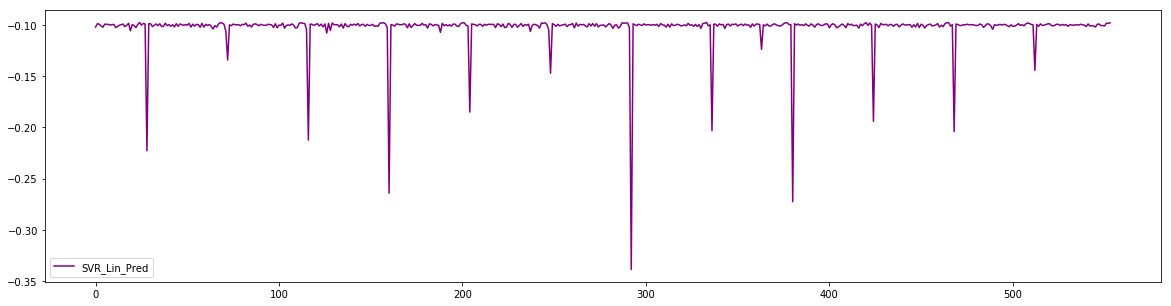

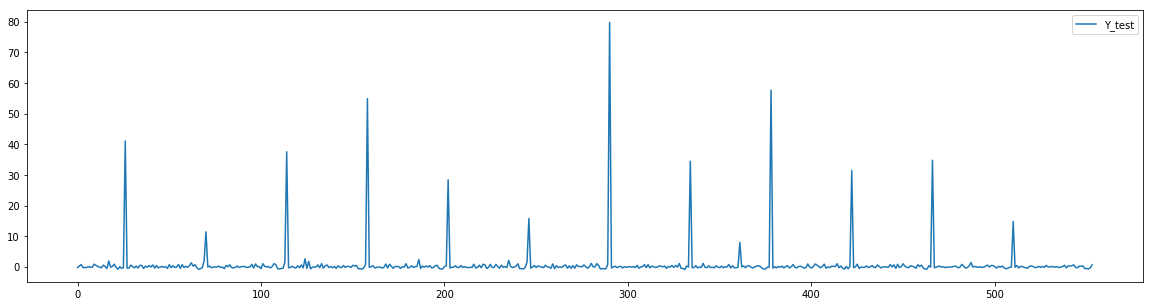

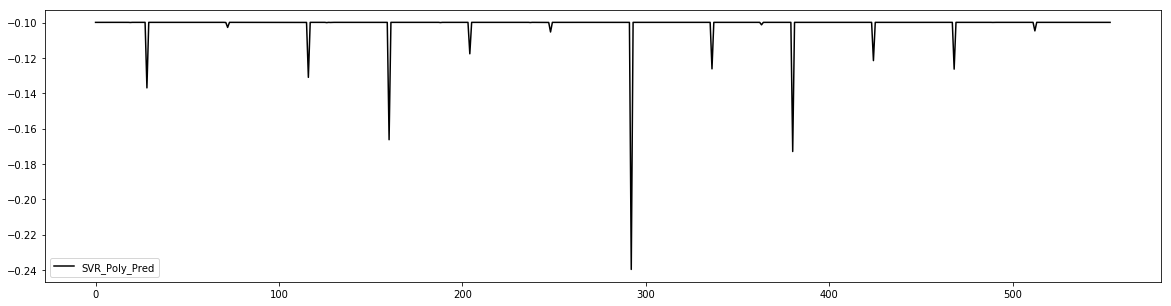

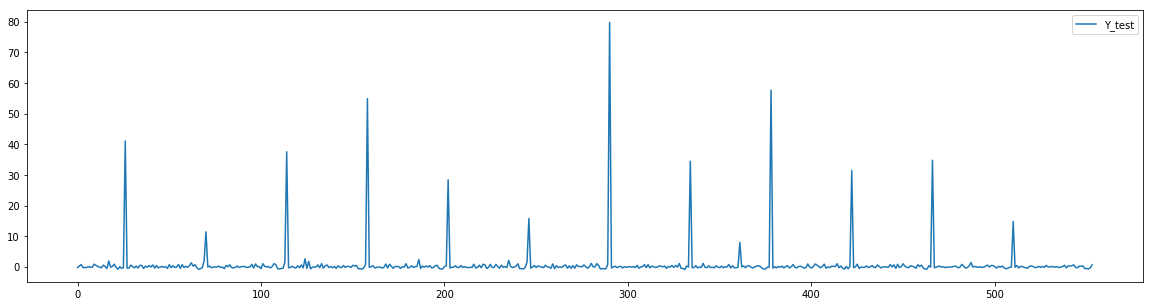

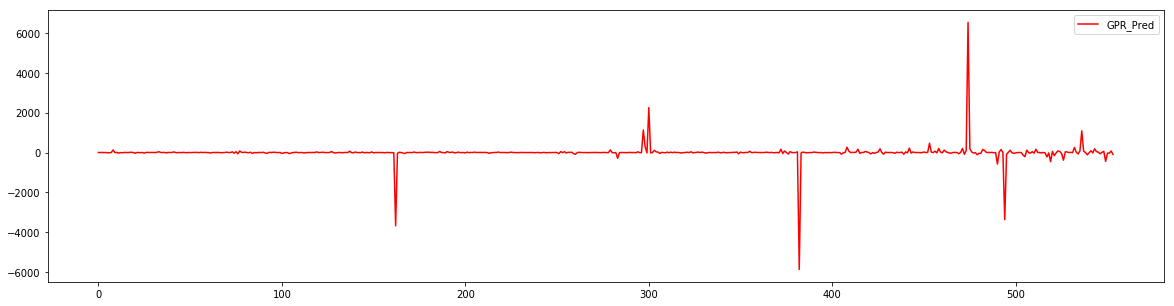

In [416]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_lasso, label = "Lasso_Pred" , color = 'red')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_enet, label = "E_Net_Pred", color = 'green')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_ridge, label = "Ridge_Pred", color = 'orange')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_bayesian_ridge, label = "Bayesian_Ridge_Pred", color = 'purple')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_huber, label = "Huber_Pred", color = 'black')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_kernel_ridge, label = "Kernel_Ridge_Pred", color = 'red')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_svr_rbf, label = "SVR_RBF_Pred", color = 'orange')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))   
plt.plot(y_pred_svr_lin, label = "SVR_Lin_Pred", color = 'purple')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_svr_poly, label = "SVR_Poly_Pred", color = 'black')
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(Y_test, label = "Y_test")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.plot(y_pred_gpr, label = "GPR_Pred", color = 'red')
plt.legend()
#plt.title("Y Test")
plt.show()